INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


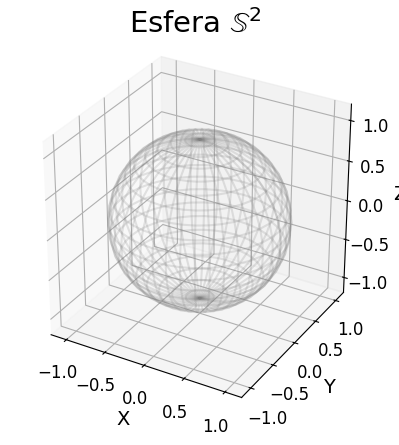

In [ ]:
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.visualization import plot
import matplotlib.pyplot as plt

sphere = Hypersphere(dim=2)
points = sphere.random_uniform(n_samples=0)

plot(points, space='S2', color='green', alpha=0.5)
plt.title("Esfera $\\mathbb{S}^2$")
plt.show()

INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


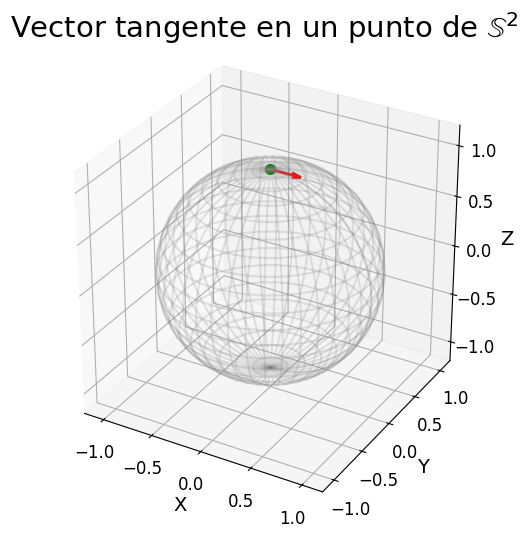

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.visualization import plot

sphere = Hypersphere(dim=2)


base_point = np.array([0.0, 0.0, 1.0])


tangent_vec = np.array([1.0, 0.0, 0.0]) 


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
plot(points=base_point[None, :], space='S2', ax=ax, color='green', s=50)


ax.quiver(
    base_point[0], base_point[1], base_point[2],  # origen de la flecha
    tangent_vec[0], tangent_vec[1], tangent_vec[2],  # componentes del vector
    color='red', length=0.3, normalize=True, linewidth=2
)

ax.set_title("Vector tangente en un punto de $\\mathbb{S}^2$")
plt.show()

INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


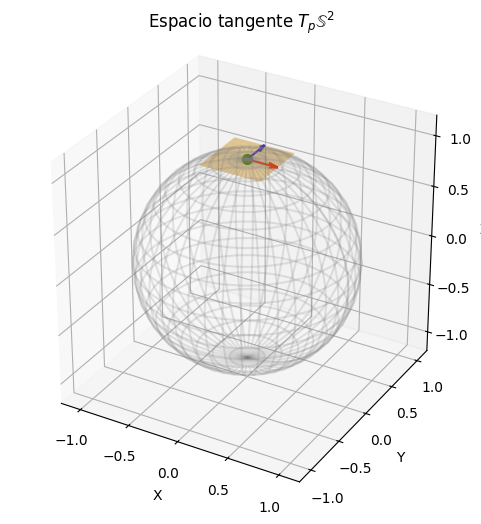

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.visualization import plot

sphere = Hypersphere(dim=2)

base_point = np.array([0.0, 0.0, 1.0])

def get_tangent_basis(p):
    
    if not np.allclose(p[:2], 0):
        v1 = np.array([-p[1], p[0], 0.0])
    else:
        v1 = np.array([1.0, 0.0, 0.0])
    v1 = v1 / np.linalg.norm(v1)
    v2 = np.cross(p, v1)
    v2 = v2 / np.linalg.norm(v2)
    return v1, v2

v1, v2 = get_tangent_basis(base_point)

grid_size = 0.3
u_vals = np.linspace(-grid_size, grid_size, 10)
v_vals = np.linspace(-grid_size, grid_size, 10)
U, V = np.meshgrid(u_vals, v_vals)


tangent_plane = base_point + U[..., None] * v1 + V[..., None] * v2

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
plot(points=base_point[None, :], space='S2', ax=ax, color='green', s=50)

ax.plot_surface(
    tangent_plane[..., 0], tangent_plane[..., 1], tangent_plane[..., 2],
    color='orange', alpha=0.4, label='Espacio tangente'
)


ax.quiver(*base_point, *v1, color='red', length=0.3, normalize=True, label='v1')
ax.quiver(*base_point, *v2, color='blue', length=0.3, normalize=True, label='v2')

ax.set_title("Espacio tangente $T_p\\mathbb{S}^2$")
plt.show()


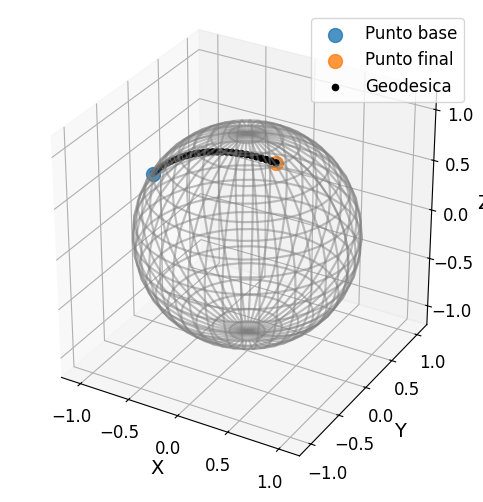

In [10]:
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.backend as gs
import matplotlib.pyplot as plt

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()
sphere = Hypersphere(dim=2)

point = gs.array([-1, -0.5, 0.8])
point = point / np.linalg.norm(point) 

vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)

geodesic = sphere.metric.geodesic(
    initial_point=point, initial_tangent_vec=tangent_vector
)

points_on_geodesic = geodesic(gs.linspace(0.0, 1.0, 30))
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")


ax = visualization.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Punto base")
ax = visualization.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Punto final")
ax = visualization.plot(
    points_on_geodesic, ax=ax, space="S2", color="black", label="Geodesica"
)


ax.legend();

INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


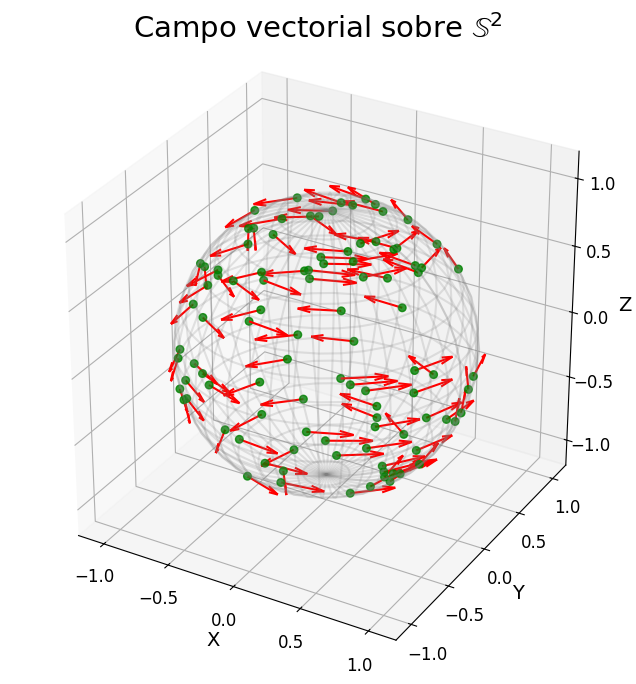

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from geomstats.geometry.hypersphere import Hypersphere
from geomstats.visualization import plot


sphere = Hypersphere(dim=2)

n_points = 100
base_points = sphere.random_uniform(n_samples=n_points)

tangent_vectors = []
for p in base_points:
    # Crear un vector ortogonal a p
    if not np.allclose(p[:2], 0):
        v = np.array([-p[1], p[0], 0.0])
    else:
        v = np.array([1.0, 0.0, 0.0])
    v = v / np.linalg.norm(v) * 0.2 
    tangent_vectors.append(v)
tangent_vectors = np.array(tangent_vectors)


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plot(base_points, space='S2', ax=ax, color='green', s=30, alpha=0.8)

for p, v in zip(base_points, tangent_vectors):
    ax.quiver(
        p[0], p[1], p[2],
        v[0], v[1], v[2],
        color='red', length=0.3, normalize=True
    )

ax.set_title("Campo vectorial sobre $\\mathbb{S}^2$")
plt.show()

INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


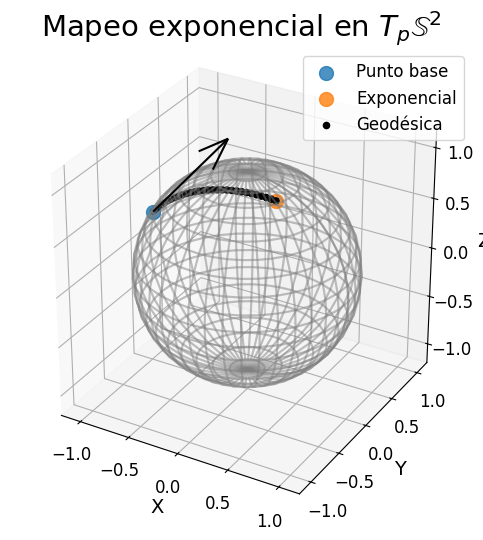

In [33]:
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.backend as gs
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()
sphere = Hypersphere(dim=2)

point = gs.array([-1, -0.5, 0.8])
point = point / np.linalg.norm(point) 

vector = gs.array([1, 0, 0.8])
tangent_vector = sphere.to_tangent(vector, base_point=point)

result = sphere.metric.exp(tangent_vector, base_point=point)

geodesic = sphere.metric.geodesic(
    initial_point=point, initial_tangent_vec=tangent_vector
)

points_on_geodesic = geodesic(gs.linspace(0.0, 1.0, 30))
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection="3d")


ax = visualization.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Punto base")
ax = visualization.plot(result, ax=ax, space="S2", s=100, alpha=0.8, label="Exponencial")
ax = visualization.plot(
    points_on_geodesic, ax=ax, space="S2", color="black", label="Geodésica"
)

arrow = visualization.Arrow3D(point, vector=tangent_vector)
arrow.draw(ax, color="black")
ax.set_title("Mapeo exponencial en $T_p\\mathbb{S}^2$")
ax.legend();

INFO: Substituting symbol S from STIXNonUnicode
INFO: Substituting symbol S from STIXNonUnicode


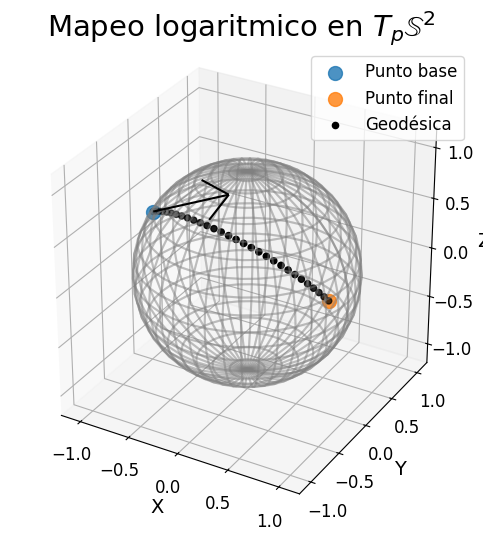

In [3]:
from geomstats.geometry.hypersphere import Hypersphere
import geomstats.backend as gs
import matplotlib.pyplot as plt
import numpy as np

import geomstats.visualization as visualization

visualization.tutorial_matplotlib()
sphere = Hypersphere(dim=2)

point = gs.array([-1, -0.5, 0.8])
point = point / np.linalg.norm(point) 

point_2 = gs.array([0.7, -0.2, 0.1])
point_2 = point_2 / np.linalg.norm(point_2)

log = sphere.metric.log(point=point_2, base_point=point)

geodesic_func = sphere.metric.geodesic(initial_point=point, end_point=point_2)

points_on_geodesic = geodesic_func(gs.linspace(0.0, 1.0, 30))

fig = plt.figure(figsize=(6, 6))

ax = fig.add_subplot(111, projection="3d")

ax = visualization.plot(point, ax=ax, space="S2", s=100, alpha=0.8, label="Punto base")
ax = visualization.plot(point_2, ax=ax, space="S2", s=100, alpha=0.8, label="Punto final")
ax = visualization.plot(
    points_on_geodesic, ax=ax, space="S2", color="black", label="Geodésica"
)

arrow = visualization.Arrow3D(point, vector=log)
arrow.draw(ax, color="black")
ax.set_title("Mapeo logaritmico en $T_p\\mathbb{S}^2$")
ax.legend();

In [2]:

import numpy as np

data = np.load('dti_data_subset.npz')
X = data['X']  
Y = data['Y']  

base_point = Y[0]  
point = Y[1]



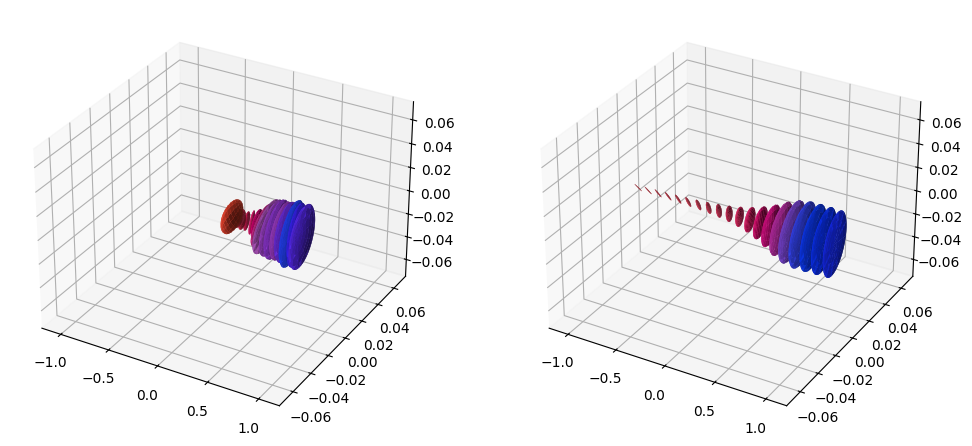

In [8]:
from manifold import PD
from sklearn.linear_model import LinearRegression
from matplotlib.colors import LightSource
from visualization import plot_ellipsoid
import matplotlib.pyplot as plt
spd_matrices = PD(3, 'LogEuclidean')
spd_matrices.LogLE(base_point, point)
vectores = []
for i in Y:
    vectores.append(spd_matrices.LogLE(base_point, i))

regresion = LinearRegression()
regresion.fit(X.reshape(-1,1), vectores)
prediccion = regresion.predict(np.linspace(-1.0, 1.0, 20).reshape(-1,1))

matriz = spd_matrices.ExpLE(base_point, prediccion)

t_plot = np.zeros((len(X), 3))
t_plot[:, 0] = X

t_pred = np.zeros((len(matriz), 3))
t_pred[:, 0] = np.linspace(-1.0, 1.0, 20)


fig = plt.figure(figsize=(12, 6))
_ = LightSource(270, 45)
ax_data = fig.add_subplot(121, projection="3d")
ax_prediction = fig.add_subplot(122, projection="3d")
for t, y in zip(t_plot, Y):
    plot_ellipsoid(ax_data, t, y, scale=0.025)

ax_data.set_zlim(-0.075, 0.075)
ax_data.set_xlim(-1.2, 1.2)
ax_data.set_ylim(-0.075, 0.075)

for t, y in zip(t_pred, matriz):
    plot_ellipsoid(ax_prediction, t, y, scale=0.025)

ax_prediction.set_zlim(-0.075, 0.075)
ax_prediction.set_xlim(-1.2, 1.2)
ax_prediction.set_ylim(-0.075, 0.075)
plt.show()